In [1]:
import numpy as np
import pandas as pd
#교통사고 데이터(CSV파일) 불러오기
accident_data = pd.read_csv("../rain_snow/accident_data.csv",encoding = 'EUC-KR')

In [2]:
accident_data

,발생일,발생시간,발생지_시도,발생지_시군구,법정동명,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,0,서울,강북구,미아동,1,0,1,6,0
1,2017-01-01,0,서울,노원구,상계동,1,0,0,1,0
2,2017-01-01,0,서울,동작구,상도동,1,0,0,1,0
3,2017-01-01,0,서울,서초구,서초동,1,0,0,1,0
4,2017-01-01,0,서울,송파구,잠실동,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
114438,2019-12-31,22,서울,송파구,송파동,1,0,0,1,0
114439,2019-12-31,22,서울,영등포구,대림동,1,0,0,1,0
114440,2019-12-31,22,서울,중랑구,면목동,1,0,0,0,1
114441,2019-12-31,23,서울,강남구,수서동,1,0,0,1,0


In [3]:
#쓰지않는 데이터 열 삭제
del accident_data['발생시간']
del accident_data['발생지_시군구']
del accident_data['발생지_시도']
del accident_data['법정동명']

In [4]:
# '발생일'컬럼을 날짜 데이터로 변환

accident_data['발생일'] = pd.to_datetime(accident_data['발생일'])

In [5]:
#같은 날짜에 발생한 사건은 합치기
accident_data_final = accident_data.groupby('발생일').sum()

# 인덱스 이름 '날짜'로 변환
accident_data_final.index.name = '날짜'
accident_data_final

,사고건수,사망자수,중상자수,경상자수,부상신고자수
날짜,,,,,
2017-01-01,73,2,25,90,10
2017-01-02,82,4,27,92,17
2017-01-03,88,1,25,80,13
2017-01-04,115,1,39,99,25
2017-01-05,103,1,34,111,8
...,...,...,...,...,...
2019-12-27,94,0,27,88,14
2019-12-28,94,0,27,105,10
2019-12-29,78,1,26,87,7


In [6]:
# 강수량 데이터(CSV파일) 불러오기
rain_df = pd.read_csv("rain_data.csv",encoding = 'EUC-KR')

# 날짜' 날짜데이터 형식으로 변환
rain_df['날짜'] = pd.to_datetime(rain_df['날짜'])

# 지점 열 삭제
rain_df.drop('지점', axis=1, inplace=True)

# 강수량 열 이름을 비로 변경
rain_df.rename(columns={'강수량(mm)': '비'}, inplace=True)

rain_df.loc[rain_df['비'].notnull(), '비'] = '비'

rain_df

,날짜,비
0,2017-01-01,NaN
1,2017-01-02,비
2,2017-01-03,NaN
3,2017-01-04,NaN
4,2017-01-05,NaN
...,...,...
1090,2019-12-27,NaN
1091,2019-12-28,NaN
1092,2019-12-29,비
1093,2019-12-30,비


In [7]:
# 눈일수 데이터(CSV파일) 불러오기
snow_data = pd.read_csv("snow_data.csv",encoding = 'EUC-KR')
snow_df = snow_data

# 연도와 날짜 열을 합치고 날짜 형식으로 변환
snow_df['날짜'] = pd.to_datetime(snow_df['연도'].astype(str) + snow_df['날짜'].astype(str), format='%Y%m%d')

# 기상현상 열 이름을 눈으로 변경
snow_df.rename(columns={'기상현상': '눈'}, inplace=True)

# 열의 순서 변경, 연도, 지점, 일 최심신적설(cm) 열 삭제
snow_df = snow_df[['날짜', '눈']]

# 데이터프레임의 '눈'열 값들을 '눈'으로 변경
snow_df['눈'] = '눈'
snow_df

C:\Users\user\AppData\Local\Temp\ipykernel_17128\3259086161.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snow_df['눈'] = '눈'


,날짜,눈
0,2017-11-02,눈
1,2017-11-03,눈
2,2017-11-08,눈
3,2017-01-20,눈
4,2017-12-01,눈
...,...,...
72,2019-12-19,눈
73,2019-12-20,눈
74,2019-12-21,눈
75,2019-12-30,눈


In [8]:
# 교통사고 데이터, 눈, 비 데이터프레임 합치기

# 'accident_data_final' 데이터프레임과 'rain_df' 데이터프레임을 날짜를 기준으로 병합
merged_df = pd.merge(accident_data_final, rain_df, on='날짜', how='left')

# 'merged_df'와 'snow_df'를 날짜를 기준으로 병합
merged_df = pd.merge(merged_df, snow_df, on='날짜', how='left')

merged_df

,날짜,사고건수,사망자수,중상자수,경상자수,부상신고자수,비,눈
0,2017-01-01,73,2,25,90,10,NaN,NaN
1,2017-01-02,82,4,27,92,17,비,NaN
2,2017-01-03,88,1,25,80,13,NaN,NaN
3,2017-01-04,115,1,39,99,25,NaN,NaN
4,2017-01-05,103,1,34,111,8,NaN,NaN
...,...,...,...,...,...,...,...,...
1091,2019-12-27,94,0,27,88,14,NaN,NaN
1092,2019-12-28,94,0,27,105,10,NaN,NaN
1093,2019-12-29,78,1,26,87,7,비,NaN
1094,2019-12-30,91,1,19,93,53,비,눈


In [9]:
merged_df['비'].fillna('', inplace=True)
merged_df['눈'].fillna('', inplace=True)

merged_df['날씨'] = merged_df['비'] + merged_df['눈']
merged_df

,날짜,사고건수,사망자수,중상자수,경상자수,부상신고자수,비,눈,날씨
0,2017-01-01,73,2,25,90,10,,,
1,2017-01-02,82,4,27,92,17,비,,비
2,2017-01-03,88,1,25,80,13,,,
3,2017-01-04,115,1,39,99,25,,,
4,2017-01-05,103,1,34,111,8,,,
...,...,...,...,...,...,...,...,...,...
1091,2019-12-27,94,0,27,88,14,,,
1092,2019-12-28,94,0,27,105,10,,,
1093,2019-12-29,78,1,26,87,7,비,,비
1094,2019-12-30,91,1,19,93,53,비,눈,비눈


In [10]:
snow_count = merged_df[merged_df['날씨'] == '눈'].shape[0]
rain_count = merged_df[merged_df['날씨'] == '비'].shape[0]
snow_rain_count = merged_df[merged_df['날씨'] == '비눈'].shape[0]

print("눈 개수:", snow_count)
print("비 개수:", rain_count)
print("비눈 개수:", snow_rain_count)

눈 개수: 9
비 개수: 344
비눈 개수: 68


In [11]:
col = ['비', '눈', '날씨']

In [12]:
df = pd.get_dummies(merged_df, columns=col)

In [13]:
df.drop(['날씨_비', '날씨_눈', '비_', '눈_', '날씨_'], axis=1, inplace=True)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


C:\Users\user\AppData\Local\Temp\ipykernel_17128\3887025668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Greens', fmt = '.2f')


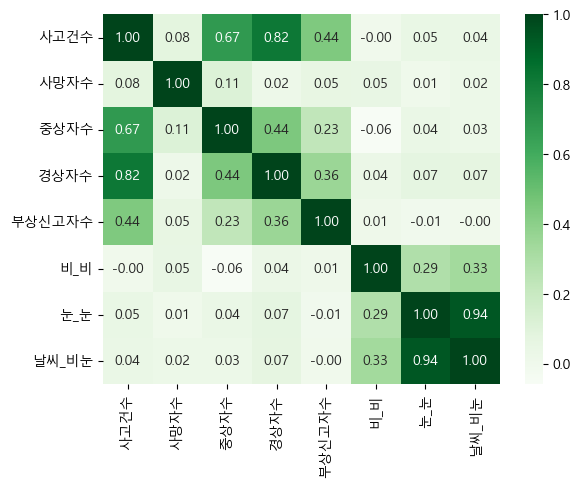

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='Greens', fmt = '.2f')
plt.show()

In [16]:
rain  = pd.read_csv("rain_data.csv",encoding = 'EUC-KR')

In [17]:
snow  = pd.read_csv("snow_data.csv",encoding = 'EUC-KR')

In [18]:
snow['날짜'] = pd.to_datetime(snow['연도'].astype(str) + snow['날짜'].astype(str), format='%Y%m%d')

In [19]:
snow.drop(['연도','지점','기상현상'], axis=1, inplace=True)

In [20]:
rain.drop('지점', axis=1, inplace=True)

In [21]:
rain.날짜 = pd.to_datetime(rain.날짜)

In [22]:
snow.날짜 = pd.to_datetime(snow.날짜)

In [23]:
merged = pd.merge(accident_data_final, rain, on='날짜', how='left')

# 'merged_df'와 'snow_df'를 날짜를 기준으로 병합
merged = pd.merge(merged, snow, on='날짜', how='left')

In [24]:
merged.fillna(0, inplace=True)

In [25]:
merged.columns = ['날짜', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수', '강수량', '적설량']

In [26]:
merged.적설량.value_counts()

0      1019
-        44
1         4
0.1       3
0         3
0.3       3
0.4       2
1.5       2
0.2       2
2.4       1
1.7       1
8.8       1
0.6       1
0.5       1
3.7       1
0.8       1
3.5       1
6.6       1
5.1       1
4.3       1
2.1       1
3.2       1
3.3       1
Name: 적설량, dtype: int64

In [27]:
merged.replace('-',0, inplace=True)

In [28]:
merged.corr(numeric_only=False)

,날짜,사고건수,사망자수,중상자수,경상자수,부상신고자수,강수량,적설량
날짜,1.000000,0.089217,-0.101307,-0.172832,0.141472,-0.020665,-0.014608,-0.034902
사고건수,0.089217,1.000000,0.079496,0.674847,0.816892,0.441506,0.059942,-0.031914
사망자수,-0.101307,0.079496,1.000000,0.112997,0.017132,0.054965,-0.001395,0.037008
중상자수,-0.172832,0.674847,0.112997,1.000000,0.443675,0.231366,0.011708,-0.007298
경상자수,0.141472,0.816892,0.017132,0.443675,1.000000,0.356990,0.094509,0.007954
부상신고자수,-0.020665,0.441506,0.054965,0.231366,0.356990,1.000000,-0.005592,-0.039446
강수량,-0.014608,0.059942,-0.001395,0.011708,0.094509,-0.005592,1.000000,0.006039
적설량,-0.034902,-0.031914,0.037008,-0.007298,0.007954,-0.039446,0.006039,1.000000


In [29]:
df.describe()

,사고건수,사망자수,중상자수,경상자수,부상신고자수,비_비,눈_눈,날씨_비눈
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,106.569343,0.819343,31.019161,103.267336,13.184307,0.375912,0.070255,0.062044
std,20.125785,0.963361,8.018506,20.856515,5.148105,0.484579,0.255694,0.241345
min,38.000000,0.000000,10.000000,34.000000,2.000000,0.000000,0.000000,0.000000
25%,94.000000,0.000000,26.000000,89.000000,10.000000,0.000000,0.000000,0.000000
50%,108.000000,1.000000,31.000000,102.000000,13.000000,0.000000,0.000000,0.000000
75%,119.000000,1.000000,36.000000,115.000000,16.000000,1.000000,0.000000,0.000000
max,184.000000,7.000000,59.000000,180.000000,53.000000,1.000000,1.000000,1.000000


df['month'] = df.날짜.dt.month

----
## ANOVA분석
상관관계에 대해서 확인을 했는데 결과가 좋지 못하네요

두가지로 확인을 한 사유는 binary로 numeric data와 corr을 확인하면 설명정도에 대해서 차이가 있을 것으로 판단하여 따로 진행을 했습니다.

하지만 numeric끼리 비교를 해도 차이가 없네요

그래서 ANOVA분석을 통해서 조금이라도 의미가 있는 것을 찾아보려고 합니다.

보통 F는 1이상, P는 0.05 미만일때 평균 차이가 존재하고, 유의미한 차이라고 할 수 있지만 해석하기 나름이라서 살짝 넘거나 작아도 크게 상관은 없습니다 


In [30]:
# anova 분석
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [31]:
df_anova = df.copy()

In [32]:
rain_0 = df_anova[df_anova['비_비'] == 0][['사고건수','사망자수', '중상자수', '경상자수', '부상신고자수']]
rain_1 = df_anova[df_anova['비_비'] == 1][['사고건수','사망자수', '중상자수', '경상자수', '부상신고자수']]

In [33]:
f_statistic_rain, p_value_rain = f_oneway(rain_0, rain_1)

In [34]:
print(f_statistic_rain, p_value_rain)

[0.00532907 3.15942034 3.66625747 1.44442332 0.12387286] [0.94181905 0.07576774 0.05578531 0.22968498 0.72493922]


In [35]:
snow_0 = df_anova[df_anova['눈_눈'] == 0][['사고건수','사망자수', '중상자수', '경상자수', '부상신고자수']]
snow_1 = df_anova[df_anova['눈_눈'] == 1][['사고건수','사망자수', '중상자수', '경상자수', '부상신고자수']]

In [36]:
f_statistic_snow, p_value_snow = f_oneway(snow_0, snow_1)

In [37]:
print(f_statistic_snow, p_value_snow)

[2.46470685 0.05489402 1.66526416 5.61857931 0.03533509] [0.11671859 0.81480002 0.19716673 0.01794366 0.8509301 ]


In [38]:
rain_snow_0 = df_anova[df_anova['날씨_비눈'] == 0][['사고건수','사망자수', '중상자수', '경상자수', '부상신고자수']]
rain_snow_1 = df_anova[df_anova['날씨_비눈'] == 1][['사고건수','사망자수', '중상자수', '경상자수', '부상신고자수']]


In [39]:
f_statistic_rain_snow, p_value_rain_snow = f_oneway(rain_snow_0, rain_snow_1)

In [40]:
print(f_statistic_rain_snow, p_value_rain_snow)

[1.66418103e+00 6.67058257e-01 7.02918747e-01 5.33085888e+00
 1.67811442e-04] [0.19731237 0.41425693 0.40198783 0.02113672 0.98966669]


In [41]:
print(pairwise_tukeyhsd(df_anova['중상자수'], df_anova['비_비'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.9563 0.0558 -1.9363 0.0237  False
---------------------------------------------------


In [42]:
print(pairwise_tukeyhsd(df_anova['경상자수'], df_anova['날씨_비눈'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   6.0178 0.0211 0.9037 11.1319   True
---------------------------------------------------


In [43]:
print(pairwise_tukeyhsd(df_anova['경상자수'], df_anova['눈_눈'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   5.8306 0.0179 1.0041 10.6571   True
---------------------------------------------------


-----
## Association Rules

이전 내용에 있던 것 같아 간단하게만 만들어 놨습니다.
lift 값이 높다는 것은 랜덤으로 선행과 후행을 추출 했을 때 보다 얼마나 발생할 확률이 높은지를 나타내는 지표라고 생각하시면 되고,
눈, 비가 consequents or antecedents에 존재하는지 확인하고, 존재할 때 일반적으로 사고가 발생하는 것보다 얼마나 lift가 높은지 보면 됩니다.
association rules은 노가다로 하나씩 찾으면서 확인해야 하는 단점이 있습니다...
한번 보시고 사용하실 생각이 있다면 사용하셔도 좋을 것 같습니다.

대략적으로 눈이나 비가 올때, 어떤 지역에서 사고가 더 많이 발생한다 이런 식으로 접근해도 괜찮을 것으로 생각됩니다.

In [44]:
ac_df = pd.read_csv('./accident_data.csv', encoding='EUC-KR')

In [45]:
ac_df.사고건수.value_counts()

1    112269
2      2116
3        55
4         3
Name: 사고건수, dtype: int64

In [46]:
ac_df.사망자수.value_counts()

0    113559
1       871
2        13
Name: 사망자수, dtype: int64

In [47]:
ac_df.중상자수.value_counts()

0     83566
1     28404
2      2040
3       326
4        73
5        19
6         8
9         2
7         2
11        1
8         1
14        1
Name: 중상자수, dtype: int64

In [48]:
ac_df.경상자수.value_counts()

1     60859
0     33375
2     13606
3      3999
4      1489
5       599
6       241
7       103
8        59
9        35
10       23
11       11
14        8
13        8
12        7
15        4
16        3
24        2
18        2
19        2
28        2
17        2
34        1
22        1
27        1
41        1
Name: 경상자수, dtype: int64

In [49]:
ac_df.부상신고자수.value_counts()

0     101928
1      11307
2        880
3        202
4         59
5         24
6         17
7          8
9          4
10         3
8          3
12         1
19         1
11         1
15         1
13         1
25         1
16         1
47         1
Name: 부상신고자수, dtype: int64

In [50]:
ac_df['발생시간'] = ac_df['발생시간'].astype(str)
ac_df['발생시간'] = ac_df['발생시간'].apply(lambda x: '0' + x if len(x) == 1 else x)
ac_df['발생일시'] = pd.to_datetime(ac_df['발생일'] + ' ' + ac_df['발생시간'], format='%Y-%m-%d %H')


In [51]:
ac_df['발생일'] = pd.to_datetime(ac_df['발생일'], format='%Y-%m-%d')

In [52]:
ac_merged = pd.merge(ac_df, rain, left_on='발생일', right_on = '날짜', how='left')
ac_merged = pd.merge(ac_merged, snow, left_on='발생일', right_on = '날짜', how='left')

In [53]:
ac_merged.drop(['날짜_x', '날짜_y','발생일','발생시간','발생지_시도','발생지_시군구'], axis=1, inplace=True)

In [54]:
ac_merged

,법정동명,사고건수,사망자수,중상자수,경상자수,부상신고자수,발생일시,강수량(mm),일 최심신적설(cm)
0,미아동,1,0,1,6,0,2017-01-01 00:00:00,NaN,NaN
1,상계동,1,0,0,1,0,2017-01-01 00:00:00,NaN,NaN
2,상도동,1,0,0,1,0,2017-01-01 00:00:00,NaN,NaN
3,서초동,1,0,0,1,0,2017-01-01 00:00:00,NaN,NaN
4,잠실동,1,0,0,1,0,2017-01-01 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114558,송파동,1,0,0,1,0,2019-12-31 22:00:00,0.0,-
114559,대림동,1,0,0,1,0,2019-12-31 22:00:00,0.0,-
114560,면목동,1,0,0,0,1,2019-12-31 22:00:00,0.0,-
114561,수서동,1,0,0,1,0,2019-12-31 23:00:00,0.0,-


In [55]:
ac_merged[['강수량(mm)']] = ac_merged[['강수량(mm)']].apply(lambda x: np.where(x.isnull(), 0, np.where(x == 0.0, 0, 1)))
ac_merged[['일 최심신적설(cm)']] = ac_merged[['일 최심신적설(cm)']].apply(lambda x: np.where(x.isnull(), 0, np.where(x == 0.0, 0, 1)))

In [56]:
ac_merged.set_index('발생일시', inplace=True)

In [57]:
ac_merged.columns = ['법정동명', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수', '비', '눈']

In [58]:
dum = pd.get_dummies(ac_merged, columns=ac_merged.columns[0:6], prefix=ac_merged.columns[0:6])

In [59]:
bad_cols = []
for col in dum.columns:
    if not dum[col].isin([0, 1]).all():
        bad_cols.append(col)

if bad_cols:
    print(bad_cols)
else:
    pass

In [60]:
from mlxtend.frequent_patterns import apriori,association_rules

In [61]:
frequent_itemsets = apriori(dum, min_support=0.05, use_colnames=True, verbose= 1).sort_values(by='support', ascending=False)

c:\Users\user\anaconda3\envs\crawling\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 108 combinations | Sampling itemset size 6


In [62]:
frequent_itemsets

,support,itemsets
3,0.992275,(사망자수_0)
2,0.981006,(사고건수_1)
22,0.973560,"(사망자수_0, 사고건수_1)"
9,0.890645,(부상신고자수_0)
35,0.883104,"(부상신고자수_0, 사망자수_0)"
...,...,...
68,0.052137,"(중상자수_0, 사망자수_0, 눈)"
158,0.052129,"(부상신고자수_0, 중상자수_1, 사고건수_1, 사망자수_0, 비, 경상자수_0)"
152,0.052129,"(부상신고자수_0, 중상자수_1, 사망자수_0, 비, 경상자수_0)"
66,0.051570,"(중상자수_0, 눈, 사고건수_1)"


In [63]:
association_rules(frequent_itemsets, metric="confidence") 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(사망자수_0),(사고건수_1),0.992275,0.981006,0.973560,0.981140,1.000136,0.000133,1.007085
1,(사고건수_1),(사망자수_0),0.981006,0.992275,0.973560,0.992410,1.000136,0.000133,1.017808
2,(부상신고자수_0),(사망자수_0),0.890645,0.992275,0.883104,0.991532,0.999252,-0.000661,0.912293
3,(사망자수_0),(부상신고자수_0),0.992275,0.890645,0.883104,0.889979,0.999252,-0.000661,0.993941
4,(부상신고자수_0),(사고건수_1),0.890645,0.981006,0.875335,0.982810,1.001839,0.001606,1.104928
...,...,...,...,...,...,...,...,...,...
482,"(중상자수_1, 경상자수_0, 비)","(부상신고자수_0, 사망자수_0)",0.053525,0.883104,0.052129,0.973907,1.102823,0.004860,4.480054
483,"(중상자수_0, 눈)",(사고건수_1),0.052600,0.981006,0.051570,0.980418,0.999401,-0.000031,0.969977
484,"(중상자수_0, 사망자수_0, 눈)",(사고건수_1),0.052137,0.981006,0.051116,0.980412,0.999394,-0.000031,0.969664
485,"(중상자수_0, 눈, 사고건수_1)",(사망자수_0),0.051570,0.992275,0.051116,0.991198,0.998915,-0.000056,0.877680


In [64]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rule_df = pd.DataFrame(rules)
rules["consequents"] = rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules["antecedents"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

goodRule = rule_df[(rule_df['confidence'] > 0.3) & (rule_df['lift'] > 2.5)]
goodRule = goodRule.reset_index()

In [65]:
goodRule

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,206,중상자수_1,경상자수_0,0.248160,0.291639,0.200798,0.809145,2.774479,0.128425,3.711521
1,207,경상자수_0,중상자수_1,0.291639,0.248160,0.200798,0.688516,2.774479,0.128425,2.413732
2,209,"중상자수_1, 사망자수_0",경상자수_0,0.247567,0.291639,0.200422,0.809569,2.775932,0.128222,3.719782
3,210,"경상자수_0, 사망자수_0",중상자수_1,0.284987,0.248160,0.200422,0.703268,2.833926,0.129700,2.533734
4,211,중상자수_1,"경상자수_0, 사망자수_0",0.248160,0.284987,0.200422,0.807633,2.833926,0.129700,3.716916
...,...,...,...,...,...,...,...,...,...,...
139,682,"부상신고자수_0, 경상자수_0, 비","중상자수_1, 사망자수_0",0.056877,0.247567,0.052129,0.916513,3.702084,0.038048,9.012600
140,683,"중상자수_1, 비, 사망자수_0","부상신고자수_0, 경상자수_0",0.067160,0.213446,0.052129,0.776189,3.636469,0.037794,3.514371
141,685,"사망자수_0, 경상자수_0, 비","부상신고자수_0, 중상자수_1",0.076534,0.239528,0.052129,0.681113,2.843569,0.033796,2.384772
142,686,"중상자수_1, 비","부상신고자수_0, 사망자수_0, 경상자수_0",0.067317,0.206899,0.052129,0.774378,3.742776,0.038201,3.515168


In [66]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,사망자수_0,사고건수_1,0.992275,0.981006,0.973560,0.981140,1.000136,0.000133,1.007085
1,사고건수_1,사망자수_0,0.981006,0.992275,0.973560,0.992410,1.000136,0.000133,1.017808
2,부상신고자수_0,사망자수_0,0.890645,0.992275,0.883104,0.991532,0.999252,-0.000661,0.912293
3,사망자수_0,부상신고자수_0,0.992275,0.890645,0.883104,0.889979,0.999252,-0.000661,0.993941
4,부상신고자수_0,사고건수_1,0.890645,0.981006,0.875335,0.982810,1.001839,0.001606,1.104928
...,...,...,...,...,...,...,...,...,...
693,"사망자수_0, 눈, 사고건수_1",중상자수_0,0.069970,0.730218,0.051116,0.730539,1.000439,0.000022,1.001190
694,"중상자수_0, 눈","사망자수_0, 사고건수_1",0.052600,0.973560,0.051116,0.971789,0.998180,-0.000093,0.937206
695,"사망자수_0, 눈","중상자수_0, 사고건수_1",0.071620,0.719499,0.051116,0.713711,0.991955,-0.000415,0.979782
696,"눈, 사고건수_1","중상자수_0, 사망자수_0",0.070511,0.723288,0.051116,0.724932,1.002273,0.000116,1.005978


### 지금은 전부 다 사용해서 시각화 한 것으로 보기 어렵습니다.
### 두가지 방법으로 시각화 해보겠습니다.
### 나중에 사용하신다면 모델 파라미터 변경하고, antecedents, consequents에서 포함되는 거 찾아서 해당 index만 뽑아 사용하면 보다 보기 편합니다.

In [67]:
import networkx as nx
import plotly.express as px

In [68]:
# lift 값 round해서 사용하면 가운데 부분이 보다 보기 편합니다.
dimension_cats = ['antecedents','lift' ,'consequents']
fig = px.parallel_categories(goodRule, dimensions=dimension_cats,color='lift', color_continuous_scale=px.colors.sequential.Viridis, width = 2000, height = 1500)
fig.update_layout(


    legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
            
        ),
    margin=dict(l=200, r=400, t=20, b=20),
    template = 'simple_white',
    hovermode='closest',
    coloraxis_colorbar=dict(
            x=None,
            y=1,
            xanchor = 'center',
            thickness=15, # colorbar 두께 설정
            len=0.6,
            title=dict(text='Color Bar'),
            orientation = 'h'
)
)
fig.show()

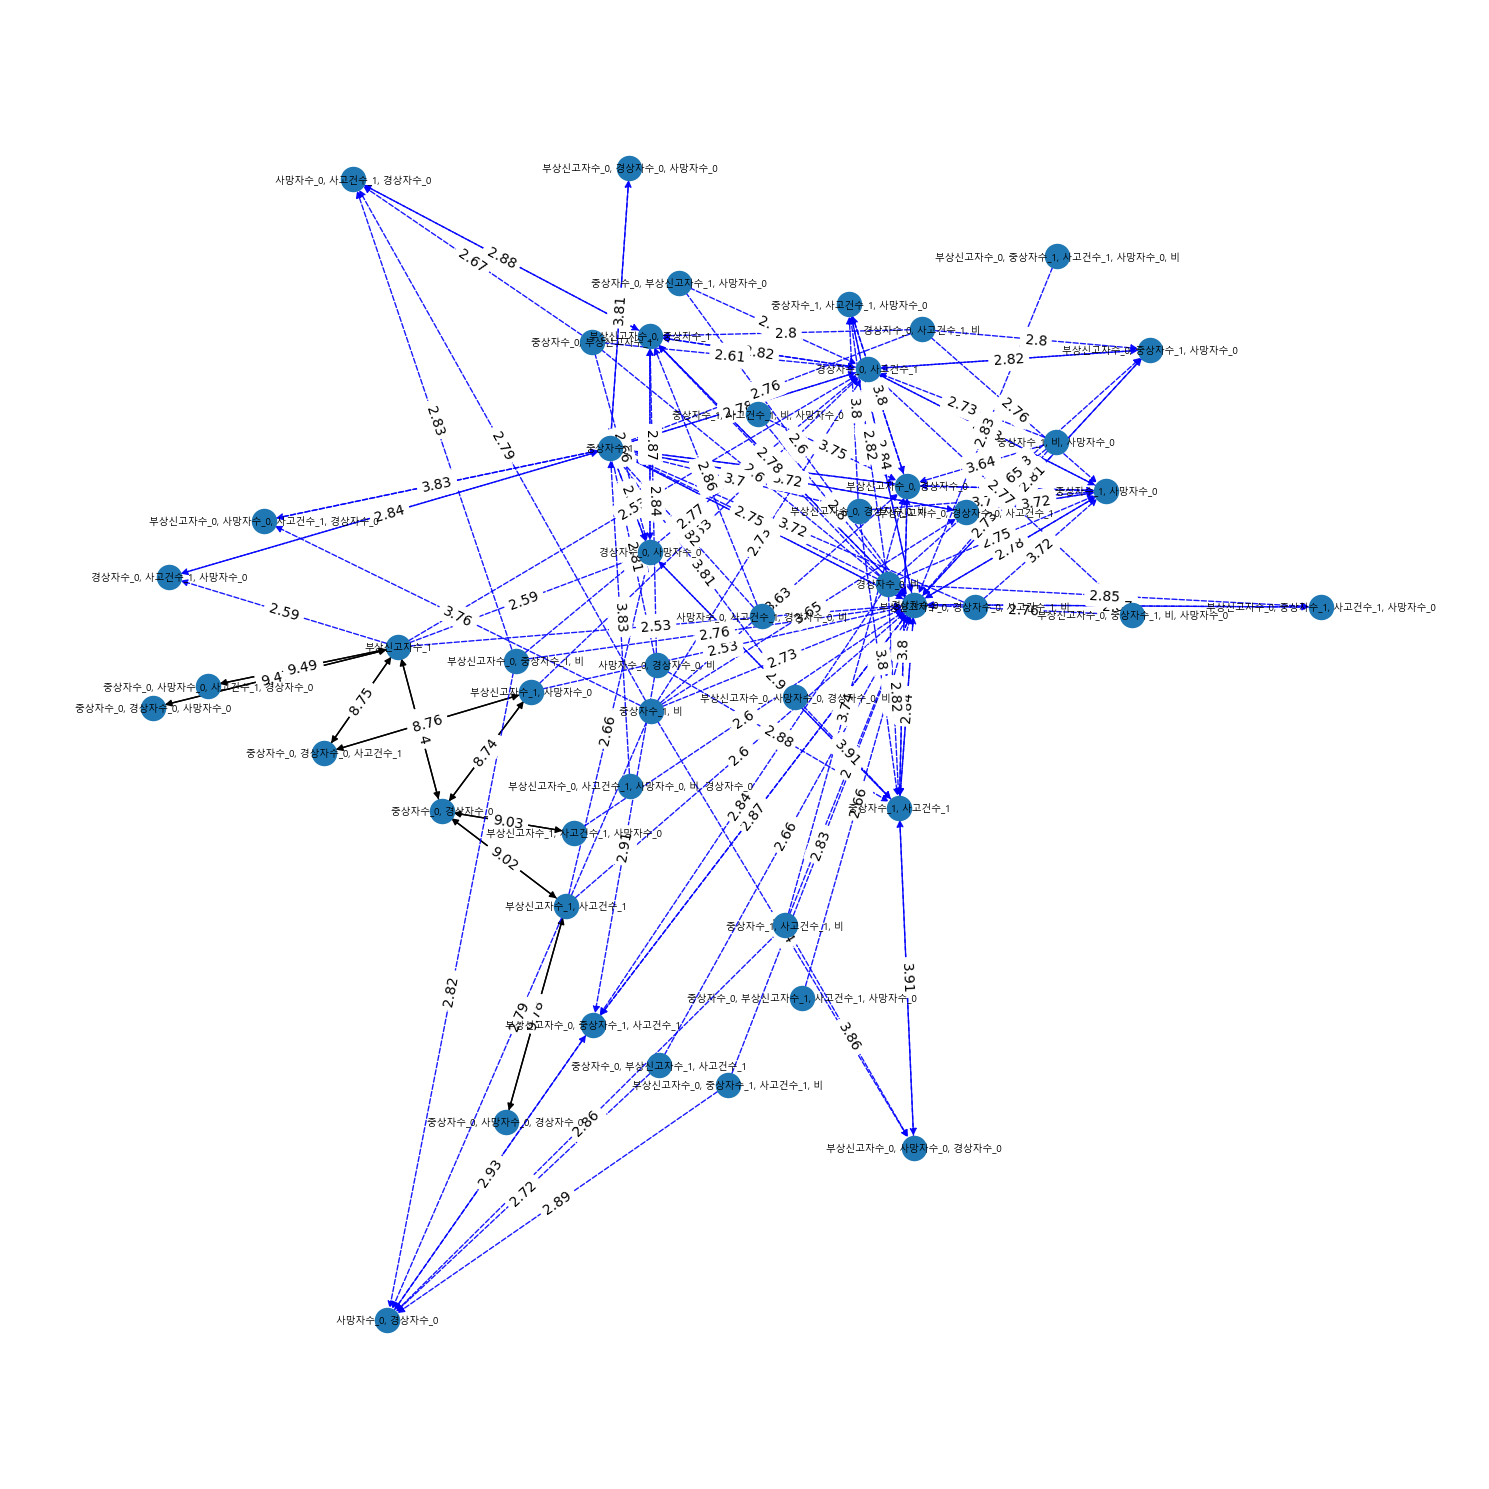

In [69]:
plt.figure(figsize=(15,15))
# Create a directed graph object
G = nx.DiGraph()

# Add edges to the graph
for i in range(len(goodRule)):
    G.add_edge(goodRule.iloc[i]['antecedents'], goodRule.iloc[i]['consequents'], weight = round(goodRule.iloc[i]['lift'],2))

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 5]

pos = nx.spring_layout(G, k = 0.7)
# nodes
nx.draw_networkx_nodes(G, pos)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, alpha=0.9, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=7, font_family="Malgun Gothic")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()